# Univariate outliers analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

## Data loading

In [2]:
%run ../util/load_data.py
%run ../util/data_visualization.py

data = load_data("../data")

/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


## Outlier detection 

Let's compute now the first and the third quantiles.

In [3]:
first_quantiles = data['train_data'][data['numerical_attributes']].quantile(0.25)
third_quantiles = data['train_data'][data['numerical_attributes']].quantile(0.75)

Now let's see which values are outside the 1.5 * IQR.

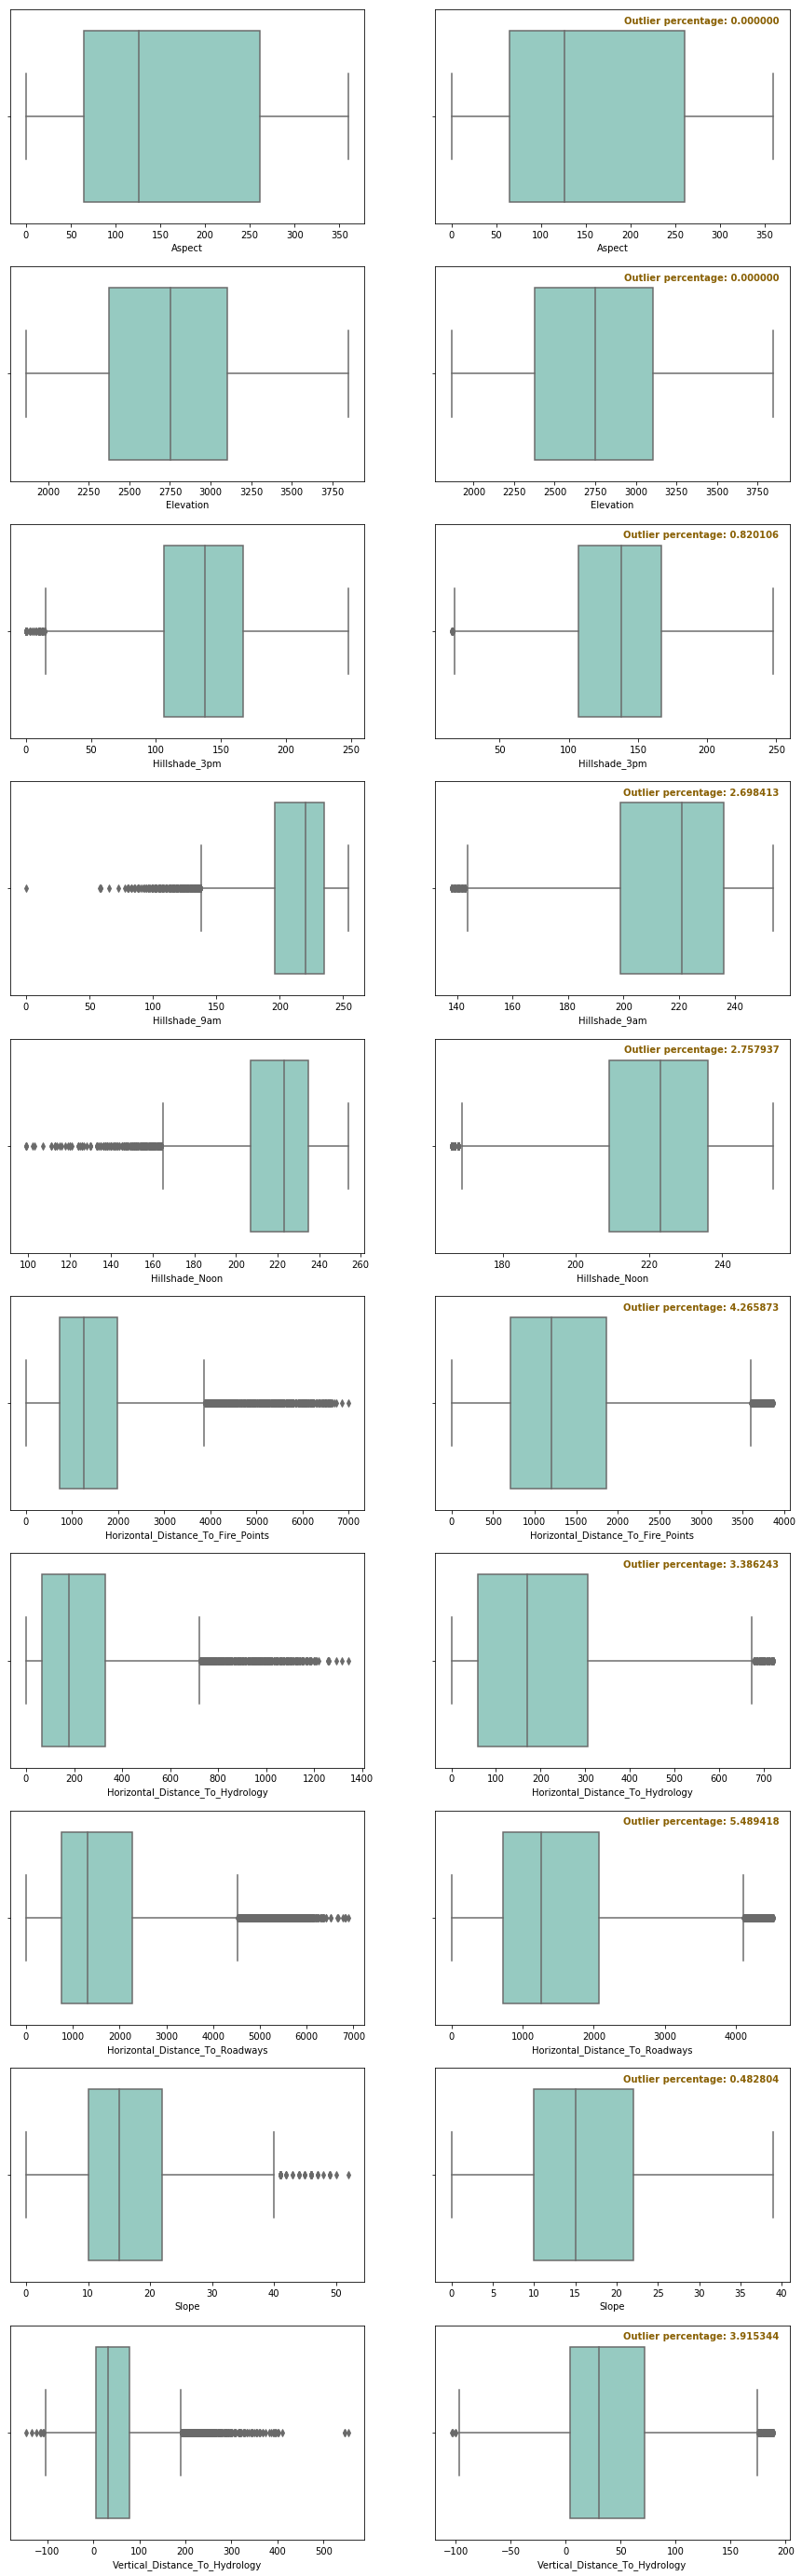

In [4]:
outlier_ids = []
_, ax = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
train_data = data['train_data']

for idx, numerical_attribute in enumerate(data['numerical_attributes']):
    first_quantile = first_quantiles[numerical_attribute]
    third_quantile = third_quantiles[numerical_attribute]
    
    iqr = third_quantile - first_quantile
    
    without_outlier_df = train_data[train_data[numerical_attribute] > first_quantile - 1.5*iqr]
    without_outlier_df = without_outlier_df[without_outlier_df[numerical_attribute] < third_quantile + 1.5*iqr]
    
    outliers = train_data[~train_data.isin(without_outlier_df).all(1)]
    outlier_ids += outliers['Id'].values.tolist()
    outlier_percentage = 100 * len(outliers.index)/len(train_data.index)
    
    ax[idx][1].text(x=0.97, y=0.97, transform=ax[idx][1].transAxes, s="Outlier percentage: %f" % outlier_percentage,\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    
    sns.boxplot(x=numerical_attribute, data=train_data, palette="Set3", ax=ax[idx][0])
    sns.boxplot(x=numerical_attribute, data=without_outlier_df, palette="Set3", ax=ax[idx][1])
    

In [ ]:
outliers = train_data[train_data['Id'].isin(outlier_ids)]
total_outlier_percentage = 100*len(outliers.index)/len(train_data.index)
"Total outlier percentage: %f" % total_outlier_percentage

'Total outlier percentage: 19.087302'

### Outlier removal

In [ ]:
data_without_univariate_outliers = train_data[~train_data['Id'].isin(outlier_ids)]
data_without_univariate_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12234 entries, 184 to 15119
Data columns (total 14 columns):
Id                                    12234 non-null int64
Elevation                             12234 non-null int64
Aspect                                12234 non-null int64
Slope                                 12234 non-null int64
Horizontal_Distance_To_Hydrology      12234 non-null int64
Vertical_Distance_To_Hydrology        12234 non-null int64
Horizontal_Distance_To_Roadways       12234 non-null int64
Hillshade_9am                         12234 non-null int64
Hillshade_Noon                        12234 non-null int64
Hillshade_3pm                         12234 non-null int64
Horizontal_Distance_To_Fire_Points    12234 non-null int64
Cover_Type                            12234 non-null int64
Soil_Type                             12234 non-null int64
Wilderness_Type                       12234 non-null int64
dtypes: int64(14)
memory usage: 1.4 MB


# Visualization

### PCA Visualization

#### Old data

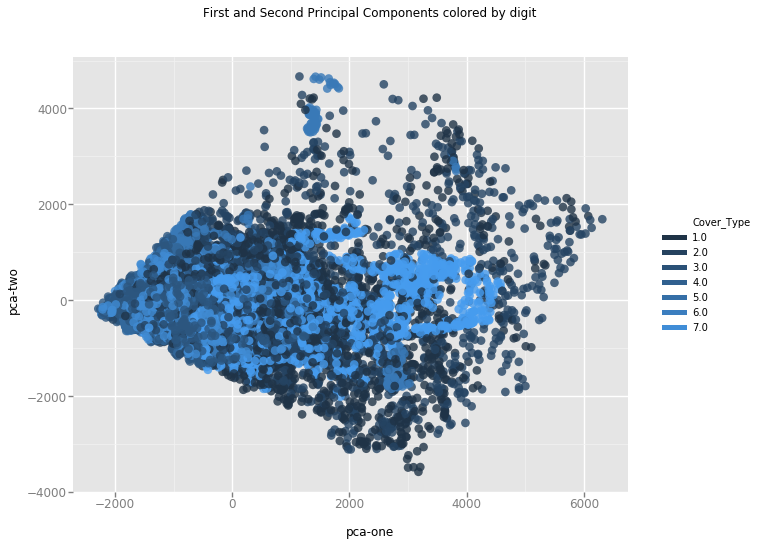

<ggplot: (-9223372036566901539)>

In [ ]:
pca_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0])

#### Without outliers data

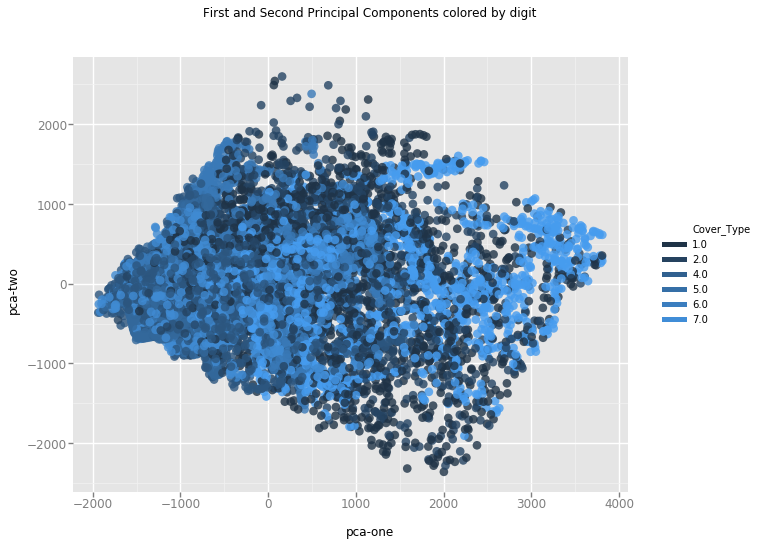

<ggplot: (295264776)>

In [ ]:
pca_visualization(data_without_univariate_outliers[data['numerical_attributes'] + data['target']], data['target'][0])

### TSNE

##### Old data

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15120 samples in 0.019s...
[t-SNE] Computed neighbors for 15120 samples in 1.179s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15120
[t-SNE] Computed conditional probabilities for sample 2000 / 15120
[t-SNE] Computed conditional probabilities for sample 3000 / 15120
[t-SNE] Computed conditional probabilities for sample 4000 / 15120
[t-SNE] Computed conditional probabilities for sample 5000 / 15120
[t-SNE] Computed conditional probabilities for sample 6000 / 15120
[t-SNE] Computed conditional probabilities for sample 7000 / 15120
[t-SNE] Computed conditional probabilities for sample 8000 / 15120
[t-SNE] Computed conditional probabilities for sample 9000 / 15120
[t-SNE] Computed conditional probabilities for sample 10000 / 15120
[t-SNE] Computed conditional probabilities for sample 11000 / 15120
[t-SNE] Computed conditional probabilities for sample 12000 / 15120
[t-SNE] Computed conditional probabilities for sa

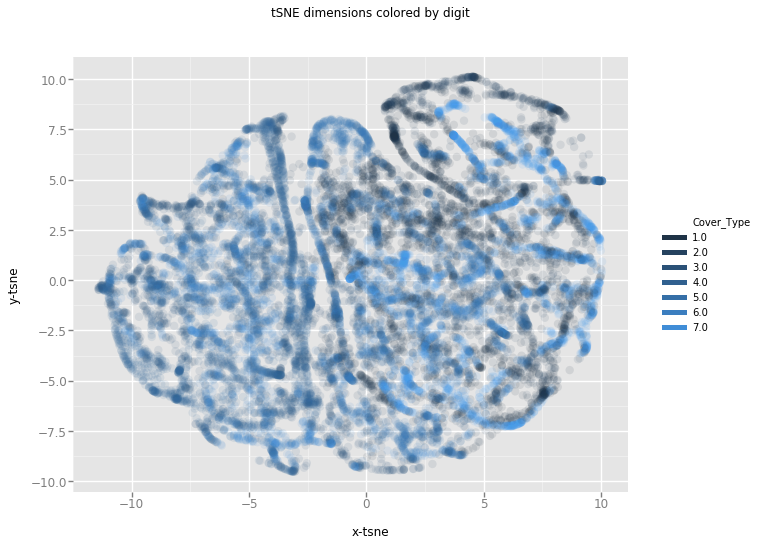

<ggplot: (295157098)>

In [ ]:
tsne_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0])

##### Data without outliers

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12234 samples in 0.010s...
[t-SNE] Computed neighbors for 12234 samples in 0.779s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12234
[t-SNE] Computed conditional probabilities for sample 2000 / 12234
[t-SNE] Computed conditional probabilities for sample 3000 / 12234
[t-SNE] Computed conditional probabilities for sample 4000 / 12234
[t-SNE] Computed conditional probabilities for sample 5000 / 12234
[t-SNE] Computed conditional probabilities for sample 6000 / 12234
[t-SNE] Computed conditional probabilities for sample 7000 / 12234
[t-SNE] Computed conditional probabilities for sample 8000 / 12234
[t-SNE] Computed conditional probabilities for sample 9000 / 12234
[t-SNE] Computed conditional probabilities for sample 10000 / 12234
[t-SNE] Computed conditional probabilities for sample 11000 / 12234
[t-SNE] Computed conditional probabilities for sample 12000 / 12234
[t-SNE] Computed conditional probabilities for sa

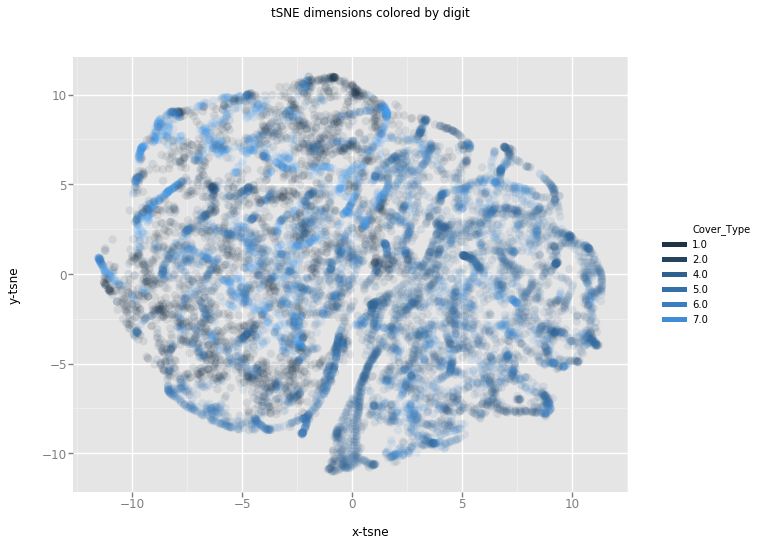

<ggplot: (295278905)>

In [ ]:
tsne_visualization(data_without_univariate_outliers[data['numerical_attributes'] + data['target']], data['target'][0])

### UMAP

##### Old data

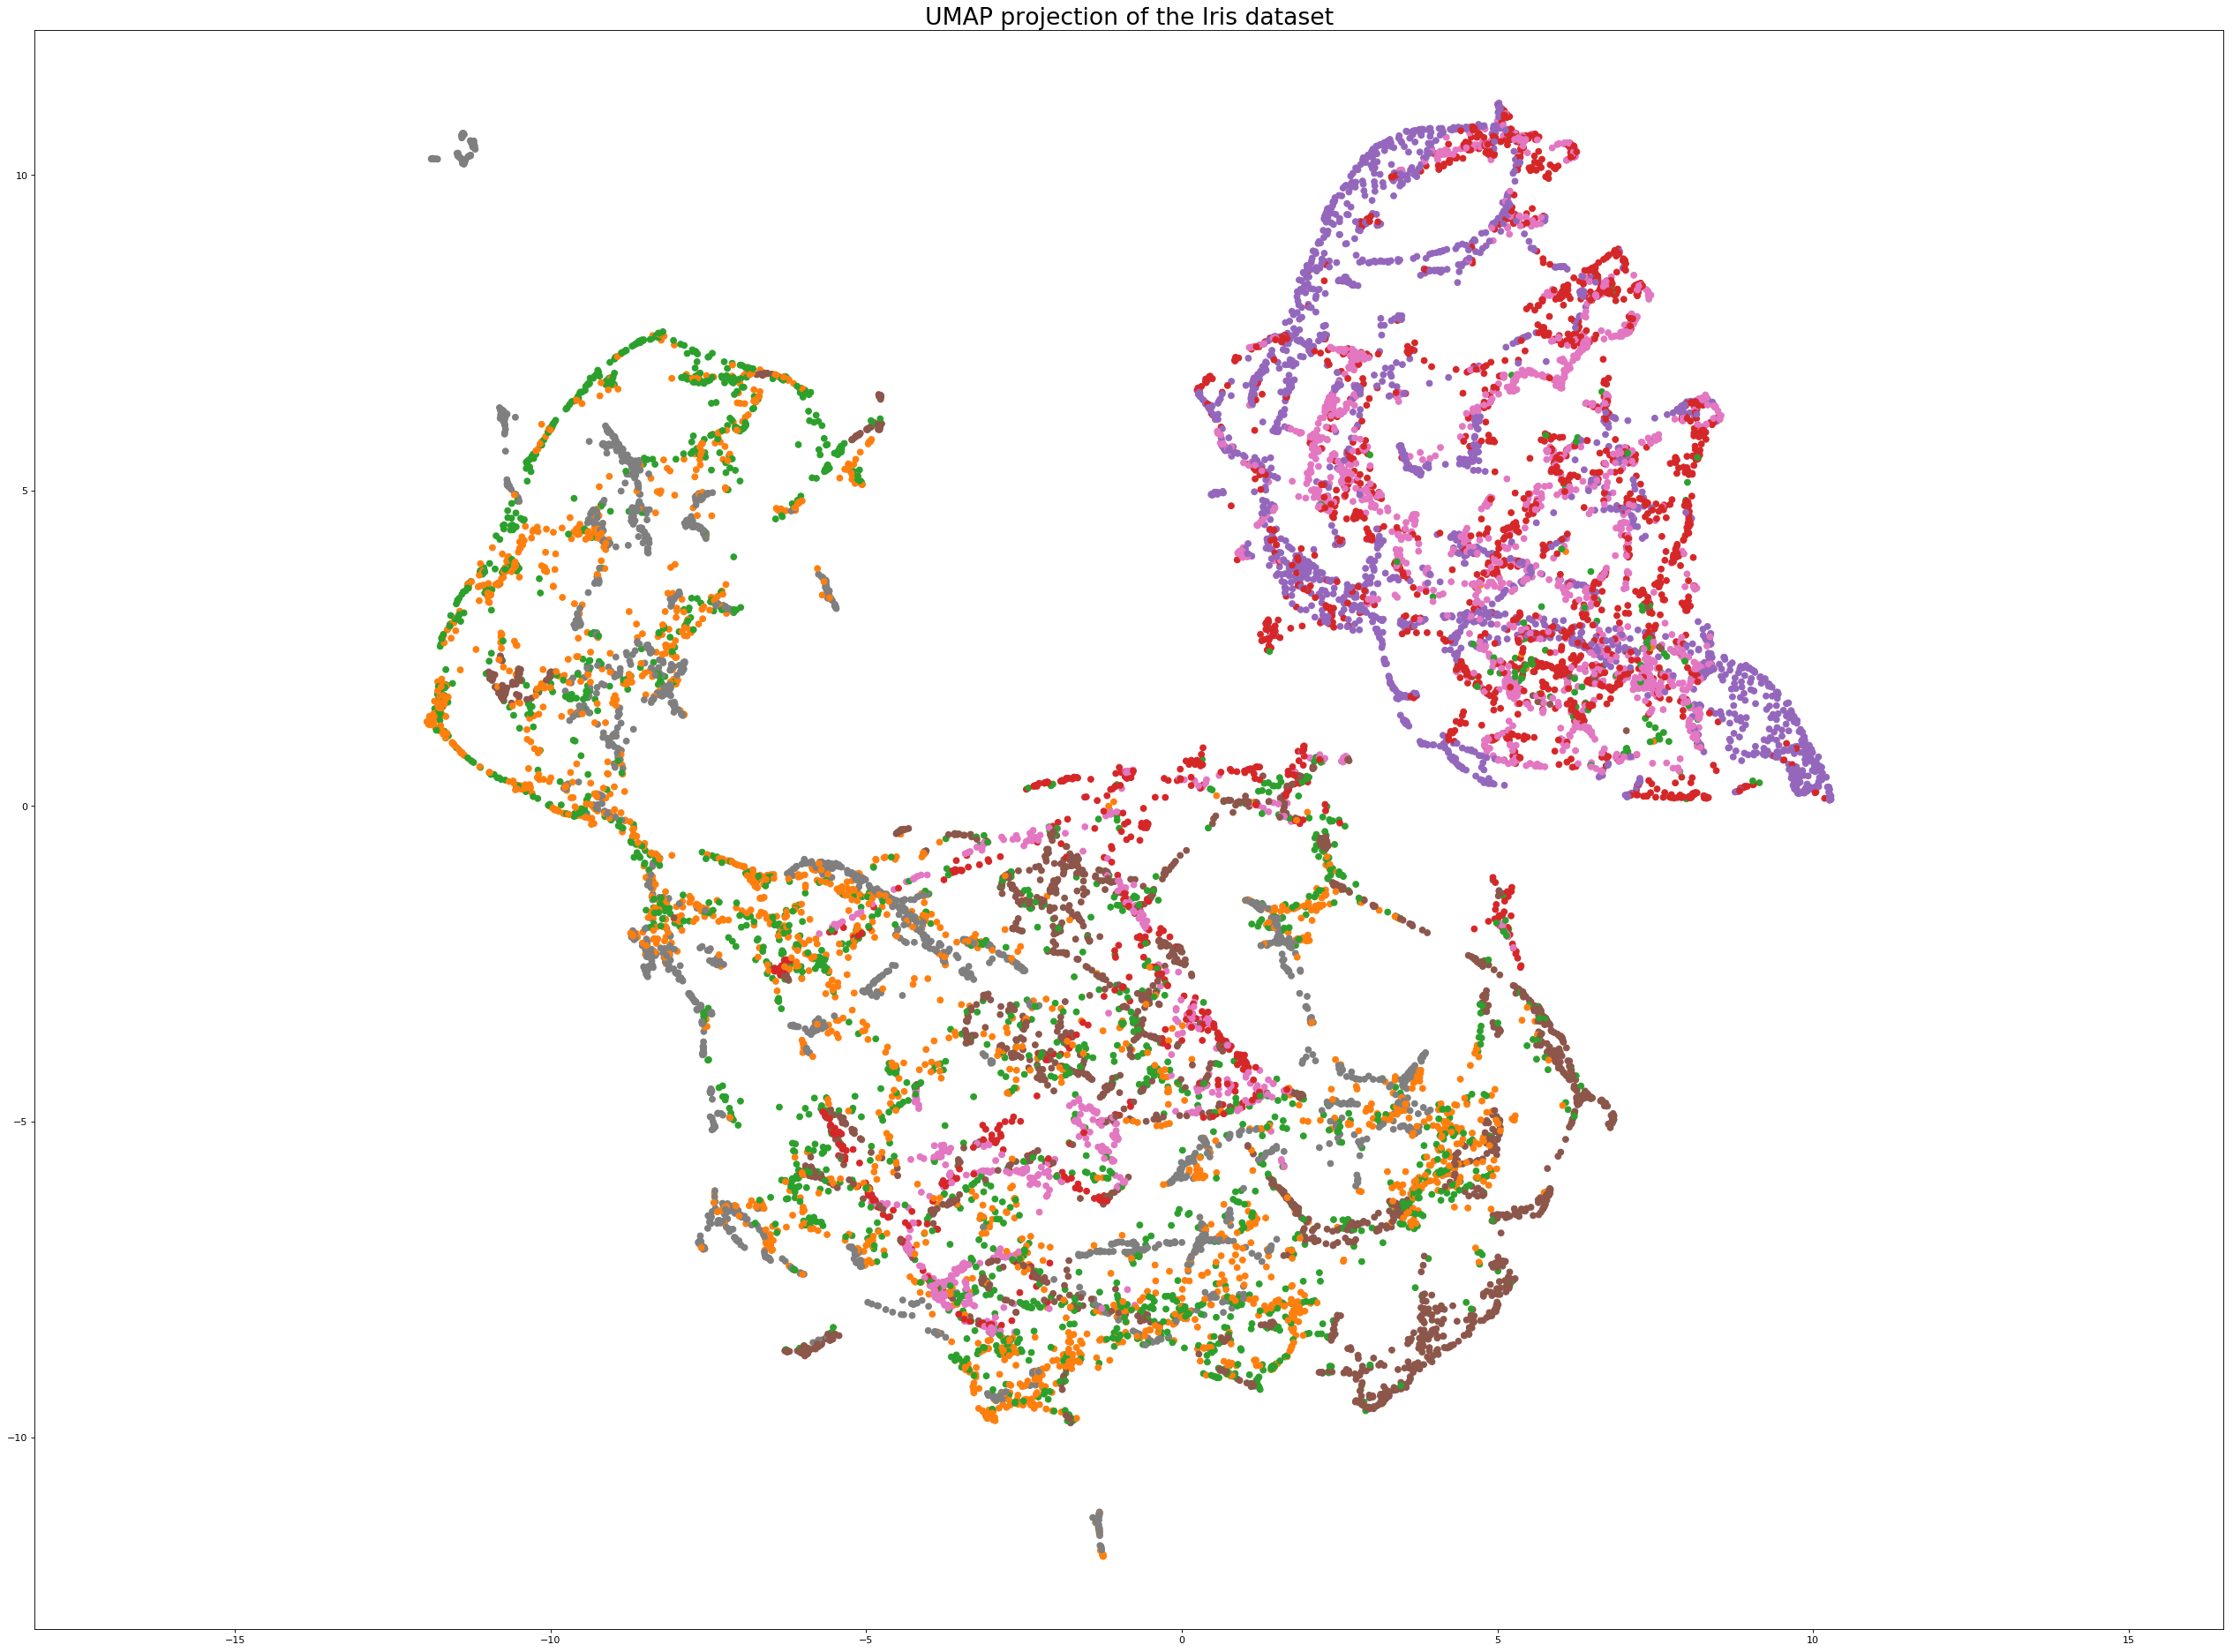

In [ ]:
umap_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0])

##### Data without outliers

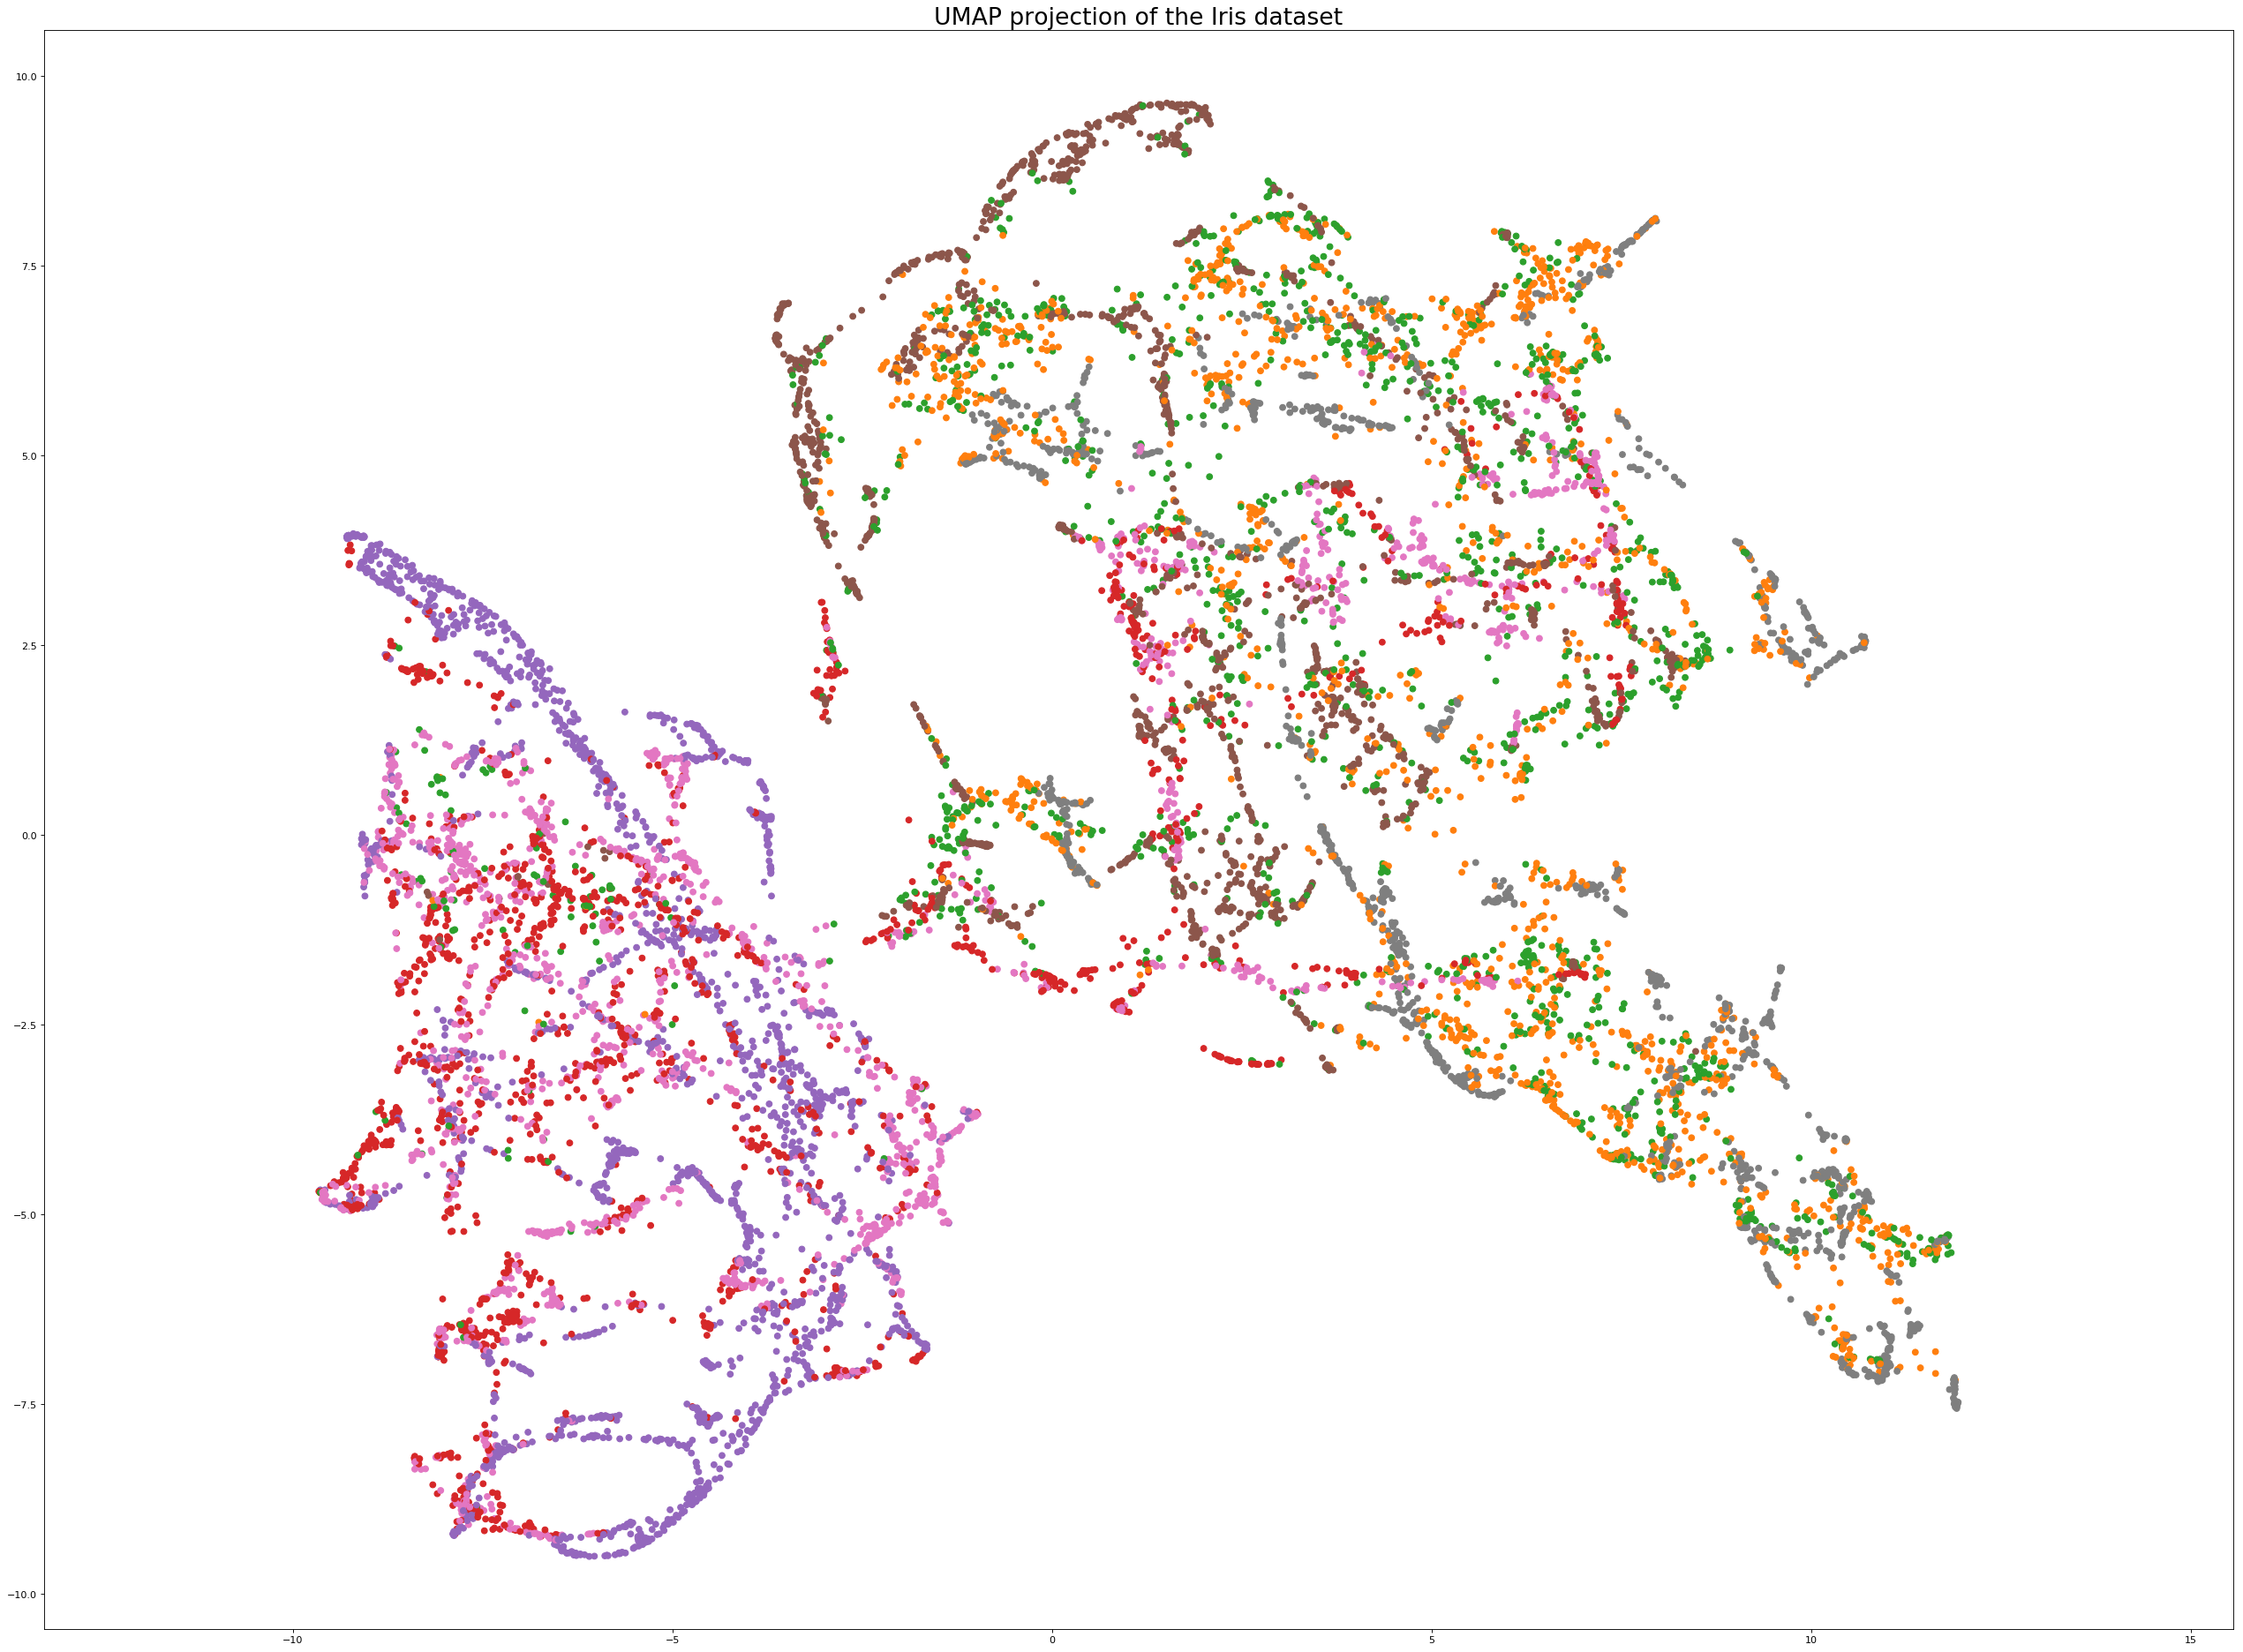

In [ ]:
umap_visualization(data_without_univariate_outliers[data['numerical_attributes'] + data['target']], data['target'][0])

### Pursuit projection

##### Old  data

In [1]:
projection_pursuit_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0])

NameError: name 'projection_pursuit_visualization' is not defined

##### Data without outliers

In [ ]:
projection_pursuit_visualization(data_without_univariate_outliers['train_data'][data['numerical_attributes'] + data['target']], data['target'][0])